In [1]:
import os,pandas as pd, numpy as np
import scipy.stats as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import savefig

In [2]:
source_dir = os.path.join('..','derivatives','0.4.joined')

In [3]:
data = pd.read_csv(os.path.join(source_dir,'all_subject_level.csv'))
data['Condition'] = data['Condition'].replace({1:'Annotated',2:'Video',3:'Original'})
data['AgeGroup'] = data['AgeGroup'].replace({1:'YA',2:'OA'})
data['Gender'] = data['Gender'].replace({1:'M',2:'F'})
data['nb_CoR'] = data['nb_CoR']*100
data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']] = data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']].replace({np.nan:0})
data

,sub,Condition,Age,Gender,EduYears,SciEdu_HS,SciEdu_UGrad,SciEdu_Grad,AgeGroup,comp_t1,...,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum,O1_sum,O2_sum,O3_sum,O4_sum,O5_sum,O6_sum
0,101,Annotated,20.0,F,14,4,7,0.0,YA,9.0,...,87,30.0,16,70,9.0,14.0,11.0,11.0,10.0,15.0
1,102,Video,19.0,F,12,3,3,0.0,YA,10.0,...,83,26.0,16,69,17.0,13.0,14.0,17.0,15.0,13.0
2,103,Original,18.0,M,12,3,0,0.0,YA,7.0,...,76,28.0,15,61,16.0,13.0,12.0,16.0,9.0,12.0
3,104,Annotated,18.0,M,12,4,0,0.0,YA,9.0,...,97,28.0,16,77,17.0,13.0,12.0,14.0,11.0,11.0
4,105,Video,18.0,M,12,6,0,0.0,YA,8.0,...,82,28.0,15,62,17.0,9.0,18.0,14.0,12.0,11.0
5,106,Original,18.0,M,12,4,0,0.0,YA,12.0,...,77,26.0,14,70,15.0,17.0,8.0,13.0,10.0,12.0
6,107,Annotated,18.0,F,12,4,1,0.0,YA,10.0,...,87,23.0,16,62,20.0,12.0,12.0,13.0,6.0,15.0
7,108,Video,18.0,F,12,5,0,0.0,YA,6.0,...,76,22.0,15,63,16.0,13.0,13.0,15.0,14.0,11.0
8,109,Original,18.0,F,13,5,2,0.0,YA,9.0,...,95,34.0,16,86,20.0,12.0,12.0,8.0,8.0,12.0
9,110,Annotated,19.0,M,12,4,0,0.0,YA,10.0,...,78,28.0,14,70,15.0,13.0,10.0,12.0,7.0,10.0


In [4]:
data.groupby(['AgeGroup','Condition']).count()['sub']

AgeGroup  Condition
OA        Annotated     6
          Original      5
          Video         6
YA        Annotated    16
          Original     17
          Video        18
Name: sub, dtype: int64

In [5]:
data.groupby(['AgeGroup','Condition']).mean()['Age']

AgeGroup  Condition
OA        Annotated    71.000000
          Original     72.500000
          Video        74.333333
YA        Annotated    20.312500
          Original     18.812500
          Video        21.000000
Name: Age, dtype: float64

In [6]:
data.groupby(['AgeGroup','Condition']).mean()['comp_change']

AgeGroup  Condition
OA        Annotated    1.500000
          Original     3.000000
          Video        4.166667
YA        Annotated    2.250000
          Original     3.764706
          Video        3.722222
Name: comp_change, dtype: float64

# Group comparisons

In [7]:
vars_of_interest = ['comp_t1','comp_t2','comp_change','nb_CoR','nb_RT',
                    'procspd_RT','NFCS_sum','TSSI_sum',
                    'vocab_sum','SciLit_sum','SciTude_sum']

In [8]:
grps_of_interest = ['Condition','AgeGroup',['AgeGroup','Condition']]

# Correlations

### Comprehension Change -> everything
#### Pearson r

In [9]:
data=data.dropna()

In [10]:
corr_df = pd.DataFrame()
for c in vars_of_interest:
    for d in vars_of_interest:
        corr_df.loc[c,d] = sp.pearsonr(data[c],data[d])[0]
corr_df

,comp_t1,comp_t2,comp_change,nb_CoR,nb_RT,procspd_RT,NFCS_sum,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum
comp_t1,1.000000,0.546520,-0.505588,0.214008,0.307709,-0.059207,0.242351,0.131569,0.304342,0.032943,0.188666
comp_t2,0.546520,1.000000,0.446214,0.091392,0.254722,-0.389132,0.327948,0.129140,0.265086,0.004865,0.391583
comp_change,-0.505588,0.446214,1.000000,-0.134541,-0.066403,-0.337630,0.078881,-0.007554,-0.052128,-0.030192,0.201811
nb_CoR,0.214008,0.091392,-0.134541,1.000000,-0.213392,-0.200717,0.044905,0.042953,-0.115741,-0.010763,-0.184118
nb_RT,0.307709,0.254722,-0.066403,-0.213392,1.000000,0.029305,0.360338,0.300421,0.189567,-0.012670,0.356837
procspd_RT,-0.059207,-0.389132,-0.337630,-0.200717,0.029305,1.000000,-0.114291,-0.044283,0.112637,-0.005616,-0.073254
NFCS_sum,0.242351,0.327948,0.078881,0.044905,0.360338,-0.114291,1.000000,0.391535,0.366539,0.105792,0.633942
TSSI_sum,0.131569,0.129140,-0.007554,0.042953,0.300421,-0.044283,0.391535,1.000000,0.313202,0.213713,0.557654
vocab_sum,0.304342,0.265086,-0.052128,-0.115741,0.189567,0.112637,0.366539,0.313202,1.000000,0.487253,0.548345
SciLit_sum,0.032943,0.004865,-0.030192,-0.010763,-0.012670,-0.005616,0.105792,0.213713,0.487253,1.000000,0.107849


In [11]:
sig_df = pd.DataFrame()
for c in vars_of_interest:
    for d in vars_of_interest:
        sig_df.loc[c,d] = sp.pearsonr(data[c],data[d])[1]
sig_df

,comp_t1,comp_t2,comp_change,nb_CoR,nb_RT,procspd_RT,NFCS_sum,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum
comp_t1,0.000000,0.000004,0.000024,0.092144,0.014155,0.644843,5.565639e-02,0.304014,0.015304,0.797710,1.386509e-01
comp_t2,0.000004,0.000000,0.000247,0.476236,0.043939,0.001621,8.693544e-03,0.313107,0.035760,0.969814,1.505499e-03
comp_change,0.000024,0.000247,0.000000,0.293126,0.605104,0.006807,5.388715e-01,0.953145,0.684928,0.814288,1.127127e-01
nb_CoR,0.092144,0.476236,0.293126,0.000000,0.093107,0.114718,7.267441e-01,0.738189,0.366360,0.933276,1.485953e-01
nb_RT,0.014155,0.043939,0.605104,0.093107,0.000000,0.819654,3.720252e-03,0.016743,0.136740,0.921489,4.094945e-03
procspd_RT,0.644843,0.001621,0.006807,0.114718,0.819654,0.000000,3.724352e-01,0.730382,0.379443,0.965154,5.682971e-01
NFCS_sum,0.055656,0.008694,0.538872,0.726744,0.003720,0.372435,0.000000e+00,0.001508,0.003130,0.409258,2.441705e-08
TSSI_sum,0.304014,0.313107,0.953145,0.738189,0.016743,0.730382,1.507668e-03,0.000000,0.012440,0.092604,2.056309e-06
vocab_sum,0.015304,0.035760,0.684928,0.366360,0.136740,0.379443,3.130414e-03,0.012440,0.000000,0.000051,3.282595e-06
SciLit_sum,0.797710,0.969814,0.814288,0.933276,0.921489,0.965154,4.092576e-01,0.092604,0.000051,0.000000,4.001555e-01


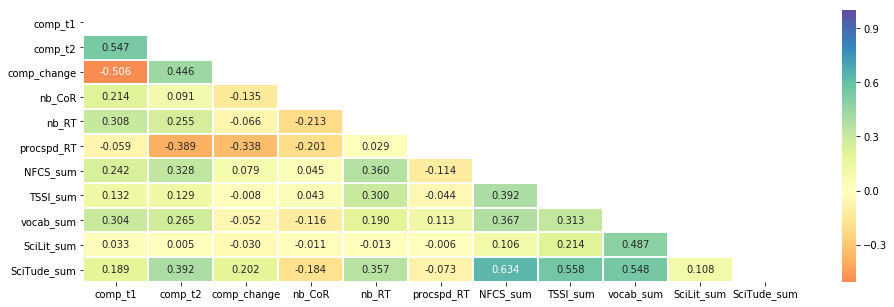

In [12]:
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,5))
sns.heatmap(corr_df, mask=mask, annot=True, cmap='Spectral',
            fmt='.3f', linewidths=1, center=0
           ).get_figure().savefig('correlations.png')

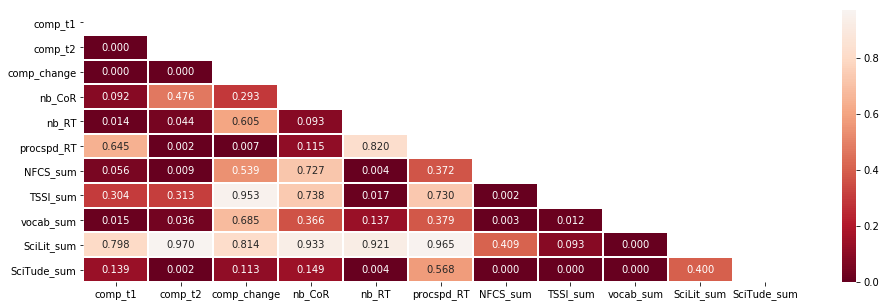

In [13]:
mask = np.zeros_like(sig_df)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,5))
sns.heatmap(sig_df, mask=mask, annot=True, cmap='RdBu',
            fmt='.3f', linewidths=1, center=1
           ).get_figure().savefig('significance.png')

## All figures - Bar plots

c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


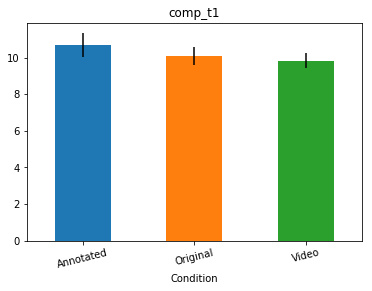

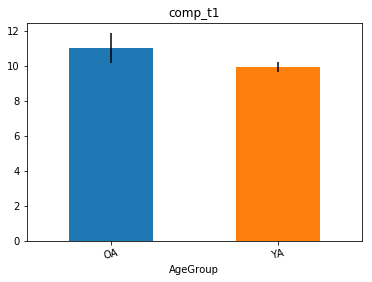

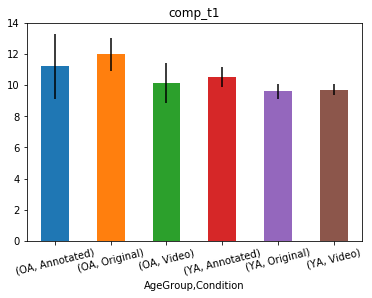

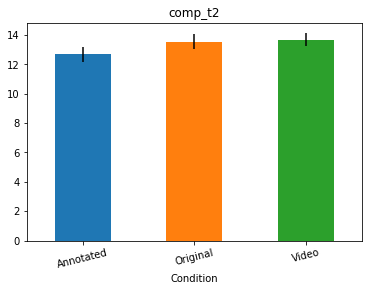

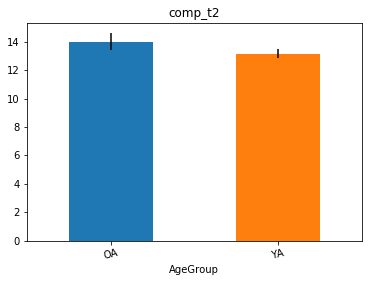

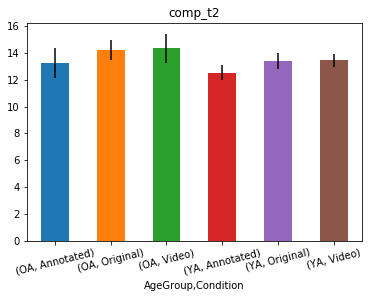

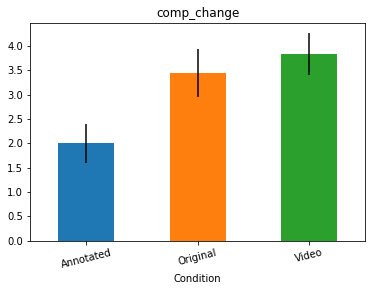

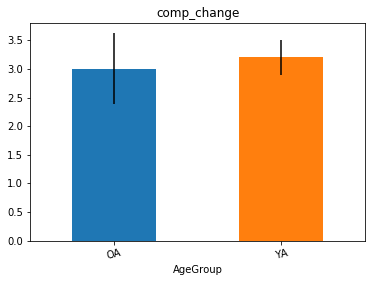

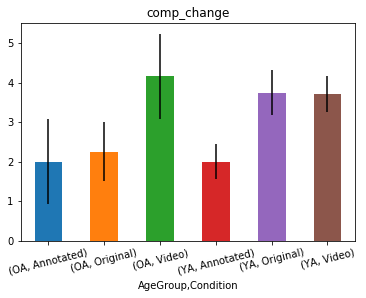

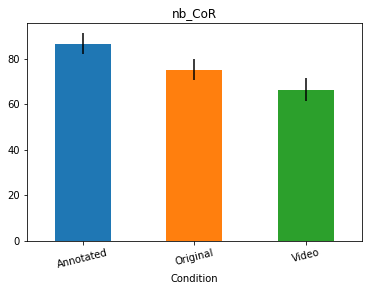

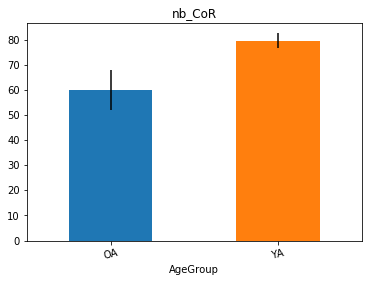

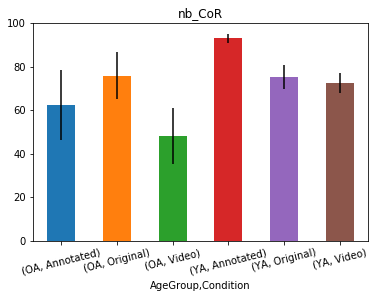

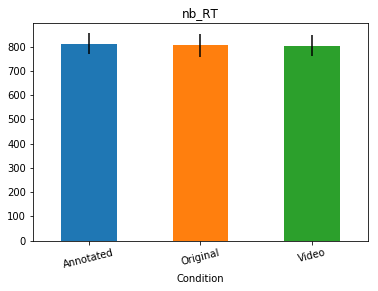

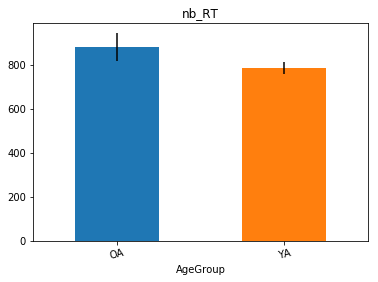

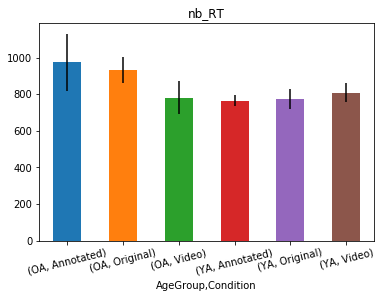

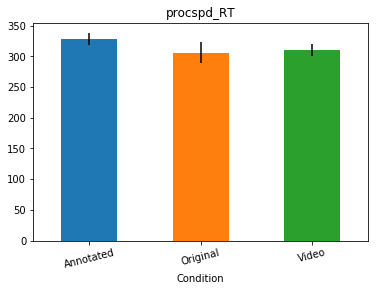

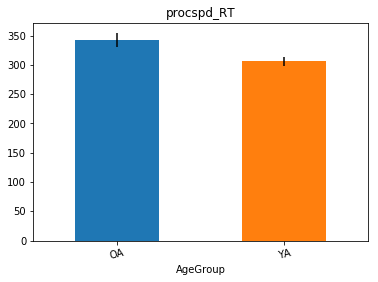

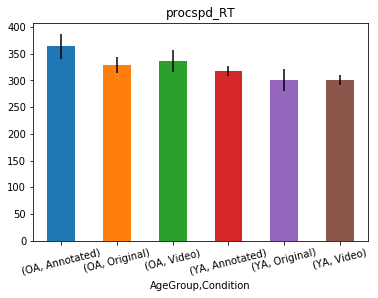

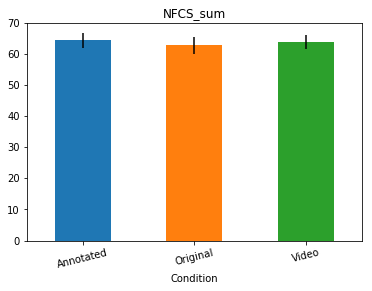

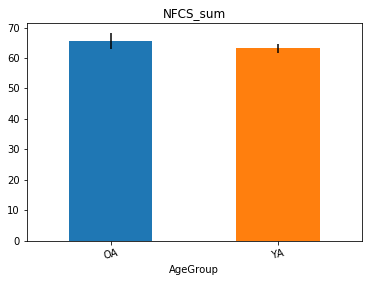

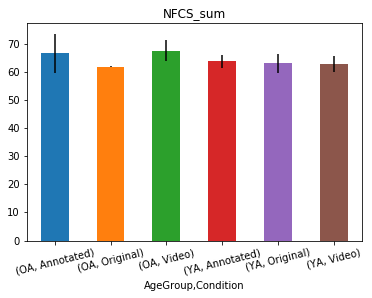

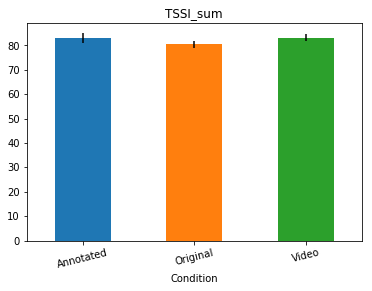

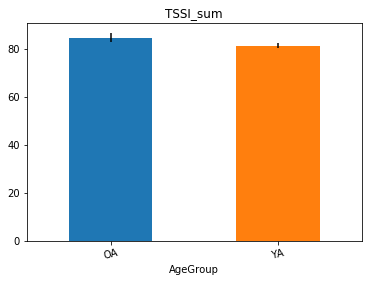

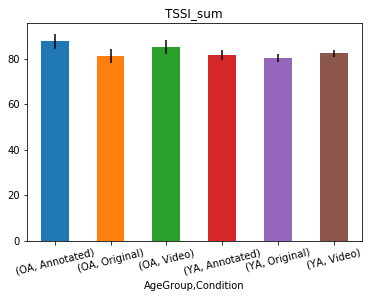

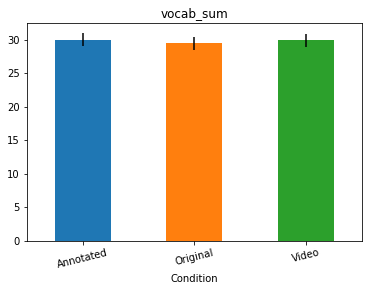

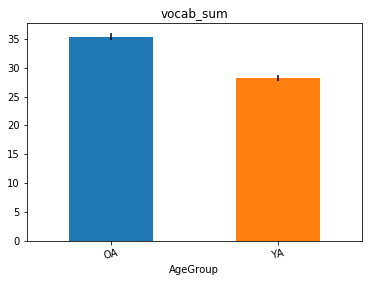

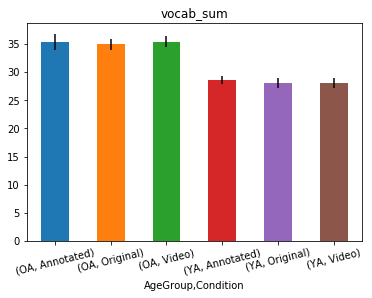

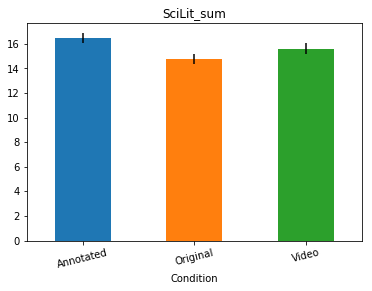

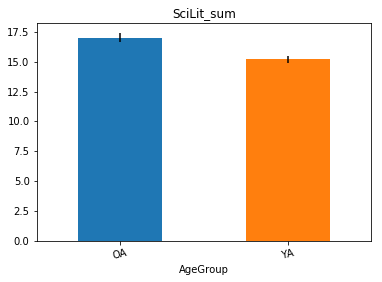

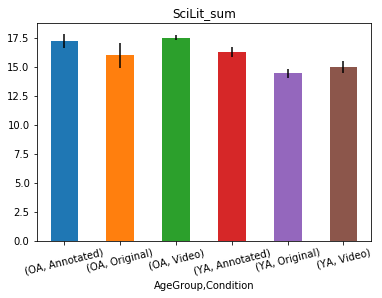

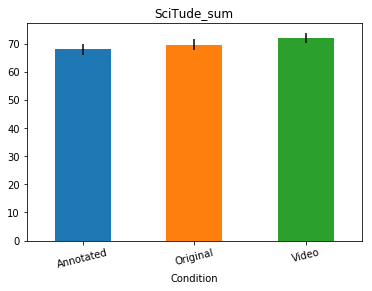

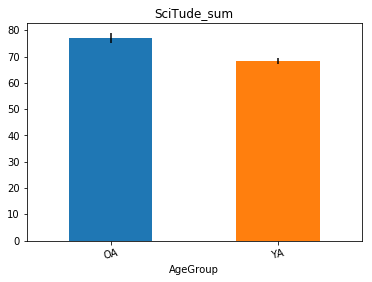

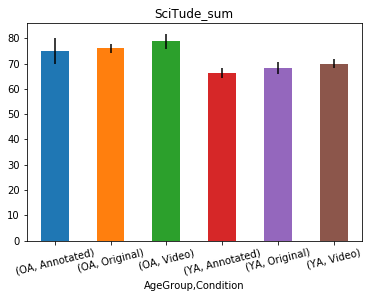

In [14]:
for var in vars_of_interest:
    for grp in grps_of_interest:
        fpath = os.path.join('..','derivatives','figures',var+'_'+''.join(grp)+'.png')
        means = data.groupby(grp).mean()
        sem = data.groupby(grp).sem()
        plot = means.plot.bar(
            y=var,yerr=sem,xticks=np.arange(0,max(data[var]),
                                            step=np.rint(max(data[var])*(1/5))),
            legend=False,title=var,rot=14
        ).get_figure().savefig(fpath)

## Figure generation - Swarm, Strip, and Box plots

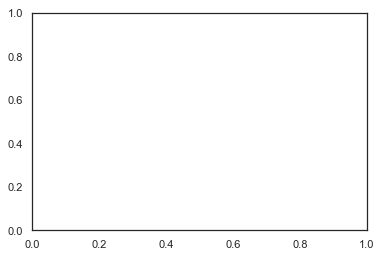

In [15]:
sns.set(style='white')
for var in vars_of_interest:
    for grp in grps_of_interest:
        df = data.set_index(grp)
        fpath = os.path.join('..','derivatives','figures',var+'_'+''.join(grp)+'_swarm.png')
        ax = sns.swarmplot(x=var,y=df.index,data=df)
        ax.get_figure().savefig(fpath)
        ax.clear()